<a href="https://colab.research.google.com/github/Kar-thi13/SmartVision/blob/main/Main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Freshness Datasets


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Required libraries


In [ ]:
!sudo apt-get install tesseract-ocr
!pip install pytesseract
!pip install pyserial

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


In [ ]:
import os
import cv2
import glob
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.layers import Dense
from keras.models import Sequential
from keras.preprocessing import image
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
from keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from keras.layers import Convolution2D,Dense,MaxPool2D,Activation,Dropout,Flatten
from keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D
import torch
from matplotlib import pyplot as plt
from PIL import Image as PILImage
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode
import cv2
import pytesseract
from tensorflow.keras.preprocessing import image as keras_image
from tensorflow.keras.models import load_model
from collections import Counter
import webcolors
from google.colab import files

Test and Train Data for freshness of fruit


In [ ]:
def get_files(directory):
  if not os.path.exists(directory):
    return 0
  count=0
  # crawls inside folders
  for current_path,dirs,files in os.walk(directory):
    for dr in dirs:
      count+= len(glob.glob(os.path.join(current_path,dr+"/*")))
  return count
train_dir ="/content/drive/MyDrive/robotics/train"
test_dir="/content/drive/MyDrive/robotics/test"
train_samples =get_files(train_dir)
#to get tags
num_classes=len(glob.glob(train_dir+"/*"))
#test file image count
test_samples=get_files(test_dir)
print(num_classes,"Classes")
print(train_samples,"Train images")
print(test_samples,"Test images")
train_samples =get_files(train_dir)
#to get tags
num_classes=len(glob.glob(train_dir+"/*"))
#test file image count
test_samples=get_files(test_dir)
print(num_classes,"Classes")
print(train_samples,"Train images")
print(test_samples,"Test images")
train_datagen=ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
    )
test_datagen=ImageDataGenerator(rescale=1./255)
input_shape=(224,224,3)
train_generator =train_datagen.flow_from_directory(train_dir,target_size=(224,224),batch_size=32)
test_generator=test_datagen.flow_from_directory(test_dir,shuffle=True,target_size=(224,224),batch_size=32)

2 Classes
7550 Train images
2698 Test images
2 Classes
7550 Train images
2698 Test images
Found 7550 images belonging to 2 classes.
Found 2698 images belonging to 2 classes.


Inception V3 model for freshness


1.Train

In [ ]:
IMAGE_SIZE = [224, 224]
inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)
# We don't need to train existing weights
for layer in inception.layers:
    layer.trainable = False
    # Model layers -> can add more if required
x = Flatten()(inception.output)
prediction = Dense(num_classes, activation='softmax')(x)
# Create a model object
model = Model(inputs=inception.input, outputs=prediction)
# View the structure of the model
model.summary()
validation_generator = train_datagen.flow_from_directory(
                       test_dir,
                       target_size=(224, 224),
                       batch_size=32)

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_94 (Conv2D)        │ (None, 111, 111, 32)   │            864 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_94    │ (None, 111, 111, 32)   │             96 │ conv2d_94[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_94             │ (None, 111, 111, 32)   │              0 │ batch_normalization_9… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_95 (Conv2D)        │ (None, 109, 109, 32)   │          9,216 │ activation_94[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_95    │ (None, 109, 109, 32)   │             96 │ conv2d_95[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_95             │ (None, 109, 109, 32)   │              0 │ batch_normalization_9… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_96 (Conv2D)        │ (None, 109, 109, 64)   │         18,432 │ activation_95[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_96    │ (None, 109, 109, 64)   │            192 │ conv2d_96[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_96             │ (None, 109, 109, 64)   │              0 │ batch_normalization_9… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_4           │ (None, 54, 54, 64)     │              0 │ activation_96[0][0]    │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_97 (Conv2D)        │ (None, 54, 54, 80)     │          5,120 │ max_pooling2d_4[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_97    │ (None, 54, 54, 80)     │            240 │ conv2d_97[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_97             │ (None, 54, 54, 80)     │              0 │ batch_normalization_9… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_98 (Conv2D)   

 Total params: 21,905,186 (83.56 MB)

 Trainable params: 102,402 (400.01 KB)

 Non-trainable params: 21,802,784 (83.17 MB)

Found 2698 images belonging to 2 classes.


In [ ]:
# Defining the cost and model optimization method to use
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
history4 = model.fit(
    train_generator,#egitim verileri
    steps_per_epoch=None,
    epochs=2,
    validation_data=validation_generator,
    validation_steps=None,
    verbose=1,
    callbacks=[ReduceLROnPlateau(monitor='val_loss', factor=0.3,patience=3, min_lr=0.000001)],
    shuffle=True)
model.save('/content/drive/MyDrive/robotics/Final_Fresh_Fruits.h5')

Epoch 1/2
236/236 ━━━━━━━━━━━━━━━━━━━━ 1467s 6s/step - accuracy: 0.9061 - loss: 0.6950 - val_accuracy: 0.9648 - val_loss: 0.2707 - learning_rate: 0.0010
Epoch 2/2
236/236 ━━━━━━━━━━━━━━━━━━━━ 1332s 6s/step - accuracy: 0.9782 - loss: 0.1367 - val_accuracy: 0.9548 - val_loss: 0.4438 - learning_rate: 0.0010


2.Test

In [ ]:
import numpy as np
from keras.models import load_model
from keras.preprocessing import image
model_inception=load_model('/content/drive/MyDrive/robotics/Final_Fresh_Fruits.h5')

Trained Models

Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2024-10-18 Python-3.10.12 torch-2.4.1+cu121 CPU

Fusing layers... 
YOLOv5x summary: 444 layers, 86705005 parameters, 0 gradients, 205.5 GFLOPs
Adding AutoShape... 


<IPython.core.display.Javascript object>

Saved to photo.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


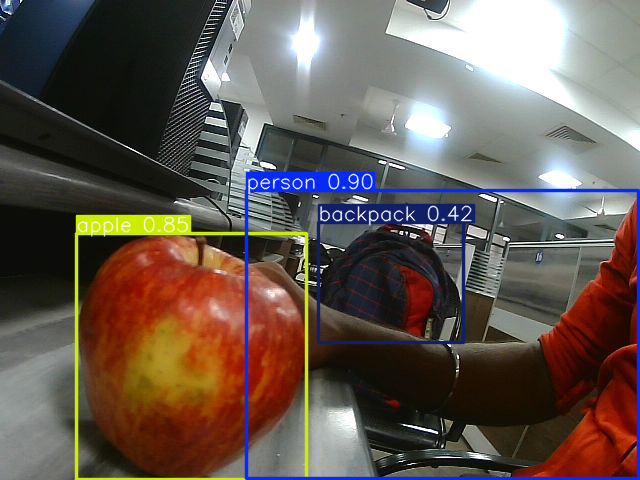

person: 0.90, Color: RGB(1, 15, 27), Shape: Circle, Text: ''
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
apple: 0.85, Freshness: rotten_fruits
backpack: 0.42, Color: red, Shape: Rectangle, Text: ''


In [ ]:
# Load the YOLOv5 model for object detection
model = torch.hub.load('ultralytics/yolov5', 'yolov5x', pretrained=True)

# Define classes for freshness model
classes=list(train_generator.class_indices.keys())

# Define the fruit classes to detect
fruit_classes_to_detect = ['apple', 'banana', 'orange']

# Function to capture an image using the webcam
def take_photo(filename='photo.jpg', quality=0.8):
    js = Javascript('''
        async function takePhoto(quality) {
            const div = document.createElement('div');
            const capture = document.createElement('button');
            capture.textContent = 'Capture';
            div.appendChild(capture);

            const video = document.createElement('video');
            video.style.display = 'block';
            const stream = await navigator.mediaDevices.getUserMedia({video: true});

            document.body.appendChild(div);
            div.appendChild(video);
            video.srcObject = stream;
            await video.play();

            google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

            await new Promise((resolve) => capture.onclick = resolve);

            const canvas = document.createElement('canvas');
            canvas.width = video.videoWidth;
            canvas.height = video.videoHeight;
            canvas.getContext('2d').drawImage(video, 0, 0);
            stream.getVideoTracks()[0].stop();
            div.remove();
            return canvas.toDataURL('image/jpeg', quality);
        }
    ''')
    display(js)
    data = eval_js('takePhoto({})'.format(quality))
    binary = b64decode(data.split(',')[1])
    with open(filename, 'wb') as f:
        f.write(binary)
    return filename

# Pre-process the image for the freshness detection model
def prepare_freshness_image(img_path):
    img = keras_image.load_img(img_path, target_size=(224, 224))
    x = keras_image.img_to_array(img)
    x = x / 255.0
    return np.expand_dims(x, axis=0)

# Function to reduce noise using Gaussian Blur and Bilateral Filtering
def reduce_noise(image):
    blurred_image = cv2.GaussianBlur(image, (5, 5), 0)
    filtered_image = cv2.bilateralFilter(blurred_image, 9, 75, 75)
    return filtered_image

# Function to detect and classify the freshness of an object
def detect_freshness(image_crop, model_inception, classes):
    img_array = cv2.cvtColor(image_crop, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
    img_pil = PILImage.fromarray(img_array)
    img_pil.save('object_crop.jpg')  # Save the crop as a temporary image file

    # Predict using the freshness model
    processed_img = prepare_freshness_image('object_crop.jpg')
    result_inception = model_inception.predict(processed_img)

    # Get the class result
    classresult = np.argmax(result_inception, axis=1)
    return classes[classresult[0]]

# Function to detect the dominant color of the object and convert it to a name
def get_dominant_color(image_crop):
    data = np.reshape(image_crop, (-1, 3))
    most_common = Counter(map(tuple, data)).most_common(1)
    rgb_color = most_common[0][0]

    # Convert RGB to color name
    try:
        color_name = webcolors.rgb_to_name(rgb_color)
    except ValueError:
        color_name = f"RGB({rgb_color[0]}, {rgb_color[1]}, {rgb_color[2]})"  # Return RGB if no match is found

    return color_name

# Function to detect the shape of the object
def detect_shape(image_crop):
    gray = cv2.cvtColor(image_crop, cv2.COLOR_BGR2GRAY)
    _, threshold = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
    contours, _ = cv2.findContours(threshold, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    for contour in contours:
        approx = cv2.approxPolyDP(contour, 0.04 * cv2.arcLength(contour, True), True)
        if len(approx) == 3:
            return "Triangle"
        elif len(approx) == 4:
            return "Rectangle"
        elif len(approx) > 4:
            return "Circle"
    return "Unknown"

# Function to detect text in the image
def detect_text(image_crop):
    gray = cv2.cvtColor(image_crop, cv2.COLOR_BGR2GRAY)
    text = pytesseract.image_to_string(gray)
    return text.strip()

# Capture and display the image, detect objects, and classify their freshness
try:
    filename = take_photo()  # Take a photo with the webcam
    print('Saved to {}'.format(filename))

    image = cv2.imread(filename)

    # Reduce noise in the image
    image = reduce_noise(image)

    # Perform object detection using YOLOv5
    results = model(filename)
    results.show()

    detected_objects = results.xyxy[0].cpu().numpy()
    confidence_threshold = 0.3  # Set the confidence threshold

    # Count the number of objects detected
    object_count = 0

    # Analyze each detected object
    for obj in detected_objects:
        bbox = obj[:4]  # Bounding box coordinates
        confidence = obj[4]  # Confidence score
        class_id = int(obj[5])  # Class ID

        # Get the detected object's name
        detected_class_name = model.names[class_id]

        # Extract object region from the image using the bounding box
        x1, y1, x2, y2 = [int(coord) for coord in bbox]
        object_crop = image[y1:y2, x1:x2]

        # Detect freshness if it's a fruit
        if detected_class_name in fruit_classes_to_detect:
            freshness_status = detect_freshness(object_crop, model_inception, classes)
            label = f"{detected_class_name}: {confidence:.2f}, Freshness: {freshness_status}"

        # Detect other attributes (color, shape, text) for all other objects
        else:
            color = get_dominant_color(object_crop)
            shape = detect_shape(object_crop)
            text = detect_text(object_crop)
            label = f"{detected_class_name}: {confidence:.2f}, Color: {color}, Shape: {shape}, Text: '{text}'"

        # Draw bounding box and label on the image
        cv2.rectangle(image, (x1, y1), (x2, y2), (255, 0, 0), 2)  # Blue box
        cv2.putText(image, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

        # Print the detected object and its details
        print(label)

    # Display the modified image with bounding boxes and labels
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

except Exception as e:
    print("Error occurred: ", e)


Object Count from Hardware


In [ ]:
# Step 1: Upload the CSV file
uploaded = files.upload()

# Step 2: Verify that the correct file was uploaded
print(uploaded)  # This prints the names of uploaded files

# Step 3: Open and display the raw content of the file to ensure correct data is present
filename = list(uploaded.keys())[0]  # Get the filename (the key of the uploaded dict)
with open(filename, 'r') as file:
    content = file.read()
   # Step 4: Load the CSV into a pandas DataFrame
df = pd.read_csv(filename)

# Step 5: Display the full DataFrame to check if all data is loaded correctly
print("\nDataFrame content:")
print(df)

# If needed, convert the 'Timestamp' to a readable date and time format
df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')


Saving arduino_output.csv to arduino_output (1).csv
{'arduino_output (1).csv': b'Timestamp,Object Count\r\n2024-10-18 17:09:26,1\r\n2024-10-18 17:09:26,2\r\n2024-10-18 17:09:27,3\r\n2024-10-18 17:09:28,4\r\n2024-10-18 17:09:29,5\r\n2024-10-18 17:09:32,6\r\n'}

DataFrame content:
             Timestamp  Object Count
0  2024-10-18 17:09:26             1
1  2024-10-18 17:09:26             2
2  2024-10-18 17:09:27             3
3  2024-10-18 17:09:28             4
4  2024-10-18 17:09:29             5
5  2024-10-18 17:09:32             6
